In [32]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import scipy
from scipy.linalg import solve
import scipy.stats as sts

from sympy import *
x, y = symbols('x, y')

# Представление функции в качетсве многочлена n-ой степени

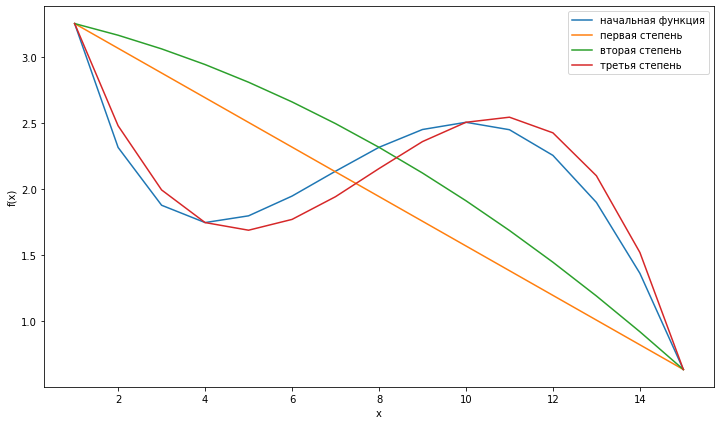

In [116]:
x = np.arange(1, 16)
f = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

plt.figure(figsize=(12, 7))
plt.plot(x, f);
plt.xlabel('x')
plt.ylabel('f(x)');


a = np.array([[1, 1], [15, 1]])
f_new = np.array([f[0], f[-1]])
ans = solve(a, f_new)
plt.plot(x, x*ans[0] + ans[1]);


a = np.array([[1, 1, 1], [64, 8, 1], [225, 15, 1]])
f_new = np.array([f[0], f[7], f[14]])
ans = solve(a, f_new)
plt.plot(x, (x**2)*ans[0] + x * ans[1] + ans[2]);


a = np.array([[1, 1, 1, 1], [1, 4**1, 4**2, 4**3], [1, 10**1, 10**2, 10**3], [1, 15**1, 15**2, 15**3]])
f_new = np.array([f[0], f[3], f[9], f[14]])
ans = solve(a, f_new)
plt.plot(x, (x**1)*ans[1] + (x**2) * ans[2] + (x**3)*ans[3]+ ans[0]);

plt.legend(['начальная функция', 'первая степень', 'вторая степень', 'третья степень']);

# Глобальная оптимизация и оптимизация негладкой функции

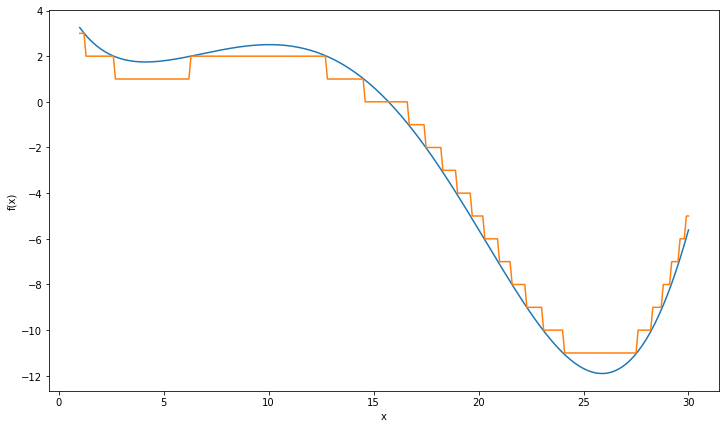

In [219]:
def f_by_x(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

def h_by_x(x):
    return int(f_by_x(x))

x = np.arange(1, 30.1, 0.1)
f = np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
h = [h_by_x(x_) for x_ in x]

plt.figure(figsize=(12, 7))
plt.plot(x, f);
plt.plot(x, h);
plt.xlabel('x')
plt.ylabel('f(x)');

In [220]:
res = scipy.optimize.minimize(f_by_x, 2, method='BFGS')
print(res)
print(np.round(res['fun'], 2))

res = scipy.optimize.differential_evolution(f_by_x, [(1, 30)])
print(res)
print(np.round(res['fun'], 2))

      fun: 1.745268290344928
 hess_inv: array([[5.98750711]])
      jac: array([-2.05636024e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([4.13627619])
1.75
     fun: -11.898894665957163
     jac: array([5.5067062e-06])
 message: 'Optimization terminated successfully.'
    nfev: 111
     nit: 6
 success: True
       x: array([25.88020204])
-11.9


In [228]:
res = scipy.optimize.minimize(h_by_x, 15, method='BFGS')
print(res)
print(np.round(res['fun'], 2))

res = scipy.optimize.differential_evolution(h_by_x, [(1, 30)])
print(res)
print(np.round(res['fun'], 2))

      fun: 0
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([15.])
0
     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([25.11360601])
-11.0
